In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
# Load sentiment analysis test dataset
sentiment_test_dataset = load_dataset("sst2", split="test")

In [3]:
# Print the first few examples (more practical for large datasets)
for example in sentiment_test_dataset.select(range(10)):
    print(example)

{'idx': 0, 'sentence': 'uneasy mishmash of styles and genres .', 'label': -1}
{'idx': 1, 'sentence': "this film 's relationship to actual tension is the same as what christmas-tree flocking in a spray can is to actual snow : a poor -- if durable -- imitation .", 'label': -1}
{'idx': 2, 'sentence': 'by the end of no such thing the audience , like beatrice , has a watchful affection for the monster .', 'label': -1}
{'idx': 3, 'sentence': 'director rob marshall went out gunning to make a great one .', 'label': -1}
{'idx': 4, 'sentence': 'lathan and diggs have considerable personal charm , and their screen rapport makes the old story seem new .', 'label': -1}
{'idx': 5, 'sentence': 'a well-made and often lovely depiction of the mysteries of friendship .', 'label': -1}
{'idx': 6, 'sentence': "none of this violates the letter of behan 's book , but missing is its spirit , its ribald , full-throated humor .", 'label': -1}
{'idx': 7, 'sentence': "although it bangs a very cliched drum at times 

In [4]:
# Load sentiment analysis test dataset
sentiment_test_dataset = load_dataset("stanfordnlp/sst2", split="test")

# Print the first few examples to verify
for example in sentiment_test_dataset.select(range(10)):
    print(example)

{'idx': 0, 'sentence': 'uneasy mishmash of styles and genres .', 'label': -1}
{'idx': 1, 'sentence': "this film 's relationship to actual tension is the same as what christmas-tree flocking in a spray can is to actual snow : a poor -- if durable -- imitation .", 'label': -1}
{'idx': 2, 'sentence': 'by the end of no such thing the audience , like beatrice , has a watchful affection for the monster .', 'label': -1}
{'idx': 3, 'sentence': 'director rob marshall went out gunning to make a great one .', 'label': -1}
{'idx': 4, 'sentence': 'lathan and diggs have considerable personal charm , and their screen rapport makes the old story seem new .', 'label': -1}
{'idx': 5, 'sentence': 'a well-made and often lovely depiction of the mysteries of friendship .', 'label': -1}
{'idx': 6, 'sentence': "none of this violates the letter of behan 's book , but missing is its spirit , its ribald , full-throated humor .", 'label': -1}
{'idx': 7, 'sentence': "although it bangs a very cliched drum at times 

In [5]:
import pandas as pd

# Load the parquet file
sentiment_test_df = pd.read_parquet('D:/AmritaUniversity/AmmachiLabs/CapacityBuildingPortal/flask-backend/DashboardApi/text_analysis/datasets/senti_test.parquet')

# Print the first few rows to verify
print(sentiment_test_df.head())

# Check the distribution of labels
label_counts = sentiment_test_df['label'].value_counts()
print("Label distribution:", label_counts)

# Print dataset columns
print(sentiment_test_df.columns)

   idx                                           sentence  label
0    0             uneasy mishmash of styles and genres .     -1
1    1  this film 's relationship to actual tension is...     -1
2    2  by the end of no such thing the audience , lik...     -1
3    3  director rob marshall went out gunning to make...     -1
4    4  lathan and diggs have considerable personal ch...     -1
Label distribution: label
-1    1821
Name: count, dtype: int64
Index(['idx', 'sentence', 'label'], dtype='object')


In [6]:
# Load sentiment analysis validation dataset
sentiment_validation_dataset = load_dataset("sst2", split="validation")  # Use "validation"

# Print the first few rows to verify
print(sentiment_validation_dataset[0])

{'idx': 0, 'sentence': "it 's a charming and often affecting journey . ", 'label': 1}


In [8]:
# Load the custom sentiment model
sentiment_model_path = "D:/AmritaUniversity/AmmachiLabs/CapacityBuildingPortal/flask-backend/DashboardApi/text_analysis/sentiment_model"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_path)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_path)

In [10]:
import pandas as pd
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [11]:
# Function to predict sentiment
def predict_sentiment(text):
    inputs = sentiment_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = sentiment_model(**inputs)
    logits = outputs.logits
    predicted_class_id = logits.argmax().item()
    predicted_sentiment = 1 if predicted_class_id == 1 else 0  # positive is 1, negative is 0
    return predicted_sentiment

# Evaluate Sentiment Analysis
sentiment_predictions = []
sentiment_labels = sentiment_validation_dataset['label']

for text in sentiment_validation_dataset['sentence']:
    sentiment_predictions.append(predict_sentiment(text))

sentiment_accuracy = accuracy_score(sentiment_labels, sentiment_predictions)
sentiment_precision, sentiment_recall, sentiment_f1, _ = precision_recall_fscore_support(sentiment_labels, sentiment_predictions, average='weighted')

Sentiment Analysis - Accuracy: 0.8394, Precision: 0.8400, Recall: 0.8394, F1-Score: 0.8393


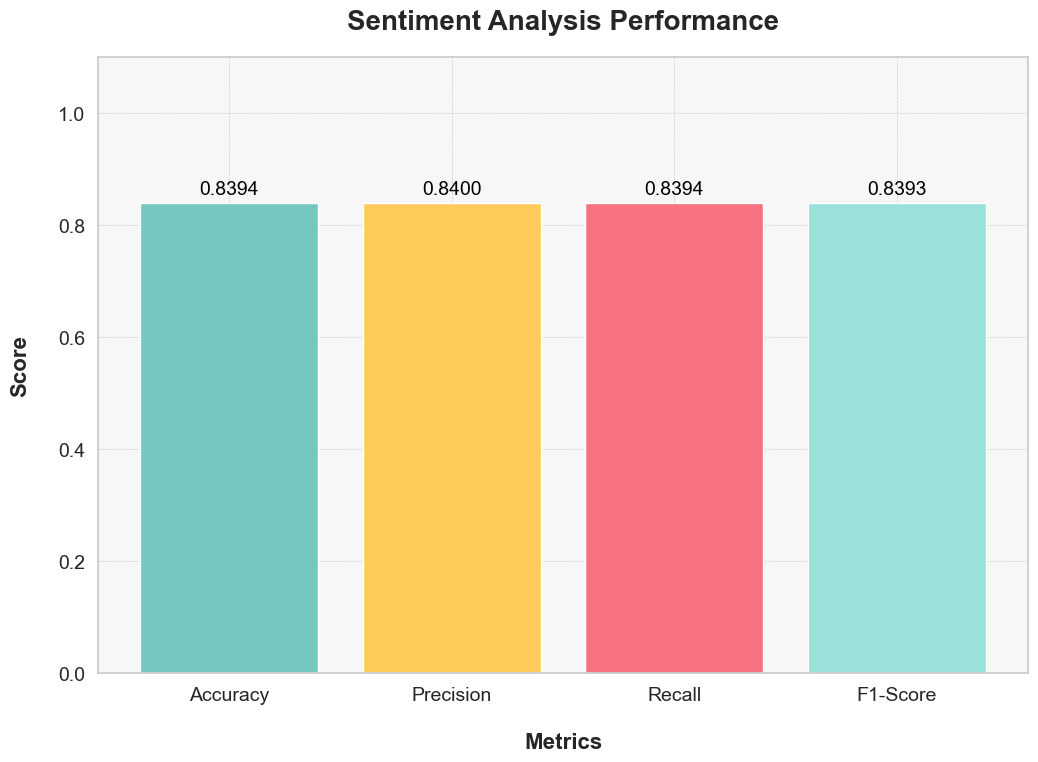

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print Sentiment Analysis Results
print(f"Sentiment Analysis - Accuracy: {sentiment_accuracy:.4f}, Precision: {sentiment_precision:.4f}, Recall: {sentiment_recall:.4f}, F1-Score: {sentiment_f1:.4f}")

# Data for plotting
sentiment_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
sentiment_values = [sentiment_accuracy, sentiment_precision, sentiment_recall, sentiment_f1]
colors = ['#76c7c0', '#ffcc5c', '#f67280', '#99e1d9']

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each bar individually with the custom colors
bars = plt.bar(sentiment_metrics, sentiment_values, color=colors)

# Add annotations
for bar, value in zip(bars, sentiment_values):
    plt.annotate(f'{value:.4f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                 textcoords='offset points')

# Set title and labels
plt.title('Sentiment Analysis Performance', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Metrics', fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel('Score', fontsize=16, fontweight='bold', labelpad=20)
plt.ylim(0, 1.1)

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Customize tick parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add background color to the plot area
plt.gca().set_facecolor('#f7f7f7')

# Show the plot
plt.show()
